In [1]:
import pandas as pd
from simpful import *

In [2]:
import pickle

# Load the pickled model
with open('best_system.pkl', 'rb') as f:
    best_system = pickle.load(f)

# Check the type of the loaded model to ensure it was loaded correctly
print(type(best_system))

# Assuming best_system has a method to evaluate its fitness or make predictions
# You can now use it as required, for example:
# fitness = best_system.evaluate_fitness(variable_store)
# predictions = best_system.predict(x_test)

# Example usage (you need to define or load variable_store and x_test accordingly):
# fitness = best_system.evaluate_fitness(variable_store)
# print(f"Loaded model fitness: {fitness}")

# Example if you want to make predictions
# predictions = best_system.predict(x_test)
# print(f"Predictions: {predictions}")


<class 'simpful.gp_fuzzy_system.evolvable_fuzzy_system.EvolvableFuzzySystem'>


/Users/nikhilrazab-sekh/Desktop/simpful_btc/implementation/new_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Define the path to the directory where the daily test sets are saved
daily_data_path = './data/daily_derived_data_from_hour/'

# Load the test sets
x_test_daily = pd.read_csv(daily_data_path + 'x_test_daily.csv')
y_test_daily = pd.read_csv(daily_data_path + 'y_test_daily.csv')

# Display the first few rows to verify the data
print("First few rows of x_test_daily:")
print(x_test_daily.head())

print("\nFirst few rows of y_test_daily:")
print(y_test_daily.head())


First few rows of x_test_daily:
   central_bank_policy_rate_prcnt  classification_numerical  cpi_monthly  \
0                             0.0                       0.0          1.0   
1                             0.0                       0.0          1.0   
2                             0.0                       0.0          1.0   
3                             0.0                       0.0          1.0   
4                             0.0                       0.0          1.0   

   dia_close  dia_volume  domestic_credit_gdp  durables_monthly  \
0   0.780265    0.000093                  1.0          0.991278   
1   0.780265    0.000093                  1.0          0.991278   
2   0.777562    0.000430                  1.0          0.991278   
3   0.757181    0.000380                  1.0          0.991278   
4   0.758269    0.000985                  1.0          0.991278   

   federal_funds_rate_daily  foreign_direct_investment_value  \
0                  0.639004                 

In [4]:
best_system.get_rules()

['IF (macd IS VERY_LOW) OR (macd IS LOW) THEN (PricePrediction IS PricePrediction)',
 'IF (macd IS VERY_LOW) OR (macd IS LOW) THEN (PricePrediction IS PricePrediction)']

In [5]:
predictions = best_system.predict_with_fis(data= x_test_daily)

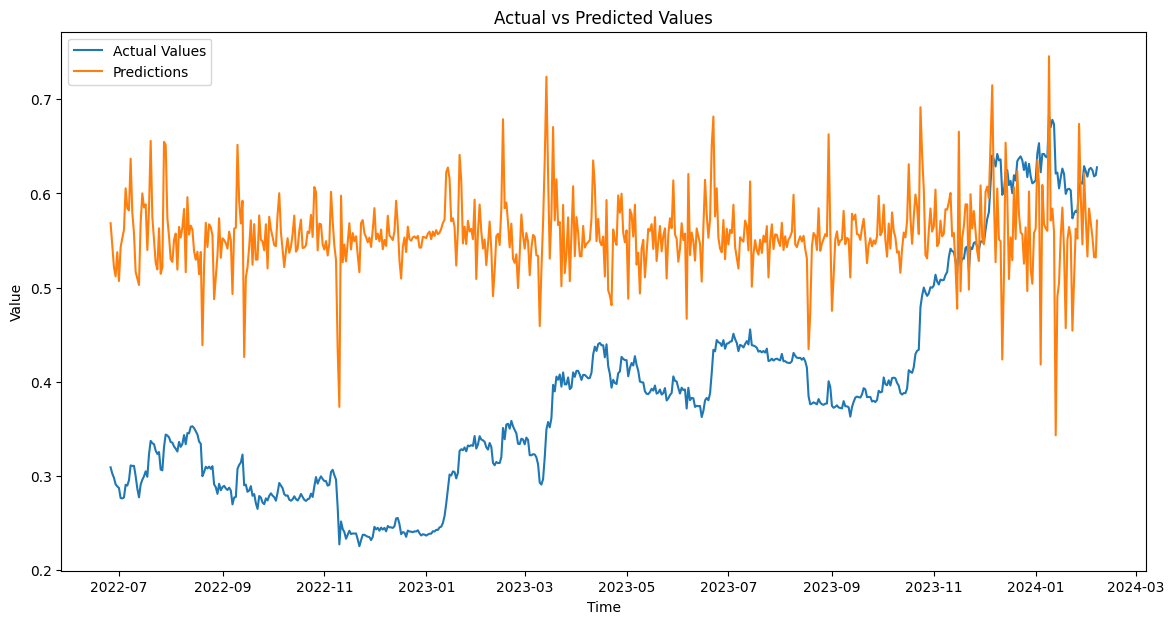

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the path to the directory where the daily test sets are saved
daily_data_path = './data/daily_derived_data_from_hour/'

# Load the test sets
x_test_daily = pd.read_csv(daily_data_path + 'x_test_daily.csv')
y_test_daily = pd.read_csv(daily_data_path + 'y_test_daily.csv')

# Assuming predictions is already computed and is a numpy array
predictions = best_system.predict_with_fis(data=x_test_daily)

# Convert the 'datetime' column in y_test_daily to datetime objects
y_test_daily['datetime'] = pd.to_datetime(y_test_daily['datetime'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test_daily['datetime'], y_test_daily['target'], label='Actual Values')
plt.plot(y_test_daily['datetime'], predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
